In [5]:
import quandl
import zipline
from zipline.api import order_target_percent, record, symbol, set_benchmark, get_open_orders
from zipline import run_algorithm
from datetime import datetime
import pytz


In [4]:
# quantum='_N85bWLCNCWz14smKHSi'
# path =' C:\Users\olono/.zipline\data\quantopian-quandl\2020-06-10T19;09;06.999754.'
#-b quantopian-quandl

# problem with zipline https://stackoverflow.com/questions/61097457/zipline-quandl-jsondecodeerror-expecting-value-line-1-column-1-char-0

# account in console IEX Cloud. You need a token and modify file benchmarks.py in zipline lybrary

In [2]:
#https://analyzingalpha.com/a-simple-trading-strategy-in-zipline-and-jupyter

In [3]:
%matplotlib inline
%load_ext zipline

In [4]:
%zipline -s 2010-1-1 -e 2020-1-1 -b quandl


C:\anaconda\envs\quantum\lib\site-packages\empyrical\stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
C:\anaconda\envs\quantum\lib\site-packages\empyrical\stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2010-01-04 21:00:00+00:00,NaN,0.0,NaN,-0.007655,NaN,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,1,[],0.0
2010-01-05 21:00:00+00:00,0.0,0.0,NaN,-0.015251,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,2,[],0.0
2010-01-06 21:00:00+00:00,0.0,0.0,NaN,-0.022789,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,3,[],0.0
2010-01-07 21:00:00+00:00,0.0,0.0,NaN,-0.030270,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,4,[],0.0
2010-01-08 21:00:00+00:00,0.0,0.0,NaN,-0.037693,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,5,[],0.0
2010-01-11 21:00:00+00:00,0.0,0.0,NaN,-0.045059,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,6,[],0.0
2010-01-12 21:00:00+00:00,0.0,0.0,NaN,-0.052369,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,7,[],0.0
2010-01-13 21:00:00+00:00,0.0,0.0,NaN,-0.059623,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,8,[],0.0
2010-01-14 21:00:00+00:00,0.0,0.0,NaN,-0.066822,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,9,[],0.0
2010-01-15 21:00:00+00:00,0.0,0.0,NaN,-0.073965,0.000000,NaN,0.0,10000000.0,0.0,0.0,...,0.0,0.0,0,None,10000000.0,0.0,0.0,10,[],0.0


In [6]:
def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')
    set_benchmark(symbol('AAPL'))

In [8]:
def handle_data(context, data):
    # Skip first 200 days to get full windows
    context.i += 1
    if context.i < 200:
        return
    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=50, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=200, frequency="1d").mean()

    # Trading logic
    open_orders = get_open_orders()

    if context.asset not in open_orders:
        if short_mavg > long_mavg:
            # order_target orders as many shares as needed to
            # achieve the desired number of shares.
            order_target_percent(context.asset, 1.0)
        elif short_mavg < long_mavg:
            order_target_percent(context.asset, 0.0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
            short_mavg=short_mavg,
            long_mavg=long_mavg)



In [10]:
# Set up the stuff for running the trading simulation
base_capital = 10000
start = datetime(2010, 1, 1, 0, 0, 0, 0, pytz.utc)
end = datetime(2018, 1, 1, 0, 0, 0, 0, pytz.utc)
# run the trading algorithm and save the results in perf
perf = run_algorithm(start, end, initialize, base_capital, handle_data,
        bundle = 'quantopian-quandl')

C:\anaconda\envs\quantum\lib\site-packages\empyrical\stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
C:\anaconda\envs\quantum\lib\site-packages\empyrical\stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


In [12]:
import numpy as np
import pandas as pd

# We need to be able to calulate the daily returns from the cumulative returns
daily_returns = pd.Series([0.5, -0.5, 0.5, -0.5])
cumulative_returns = pd.Series([0.5, -0.25, 0.125, 0.5625])

# Two different formulas to calculate daily returns
print((1 + cumulative_returns) / (1 + cumulative_returns.shift()) -1)
print((np.exp(np.log(cumulative_returns + 1).diff()) - 1))

# Recreate daily returns manually for example purposes
print(daily_returns.head(1))
print((1 - 0.25) / (1.5) - 1)
print((1 + 0.125) / (1 - 0.25) - 1)
print((1 + 0.5625) / (1 + 0.125 ) - 1)


0         NaN
1   -0.500000
2    0.500000
3    0.388889
dtype: float64
0         NaN
1   -0.500000
2    0.500000
3    0.388889
dtype: float64
0    0.5
dtype: float64
-0.5
0.5
0.38888888888888884


In [15]:
pf.utils.extract_rets_pos_txn_from_zipline(perf)

(2010-01-04 00:00:00+00:00    0.000000
 2010-01-05 00:00:00+00:00    0.000000
 2010-01-06 00:00:00+00:00    0.000000
 2010-01-07 00:00:00+00:00    0.000000
 2010-01-08 00:00:00+00:00    0.000000
 2010-01-11 00:00:00+00:00    0.000000
 2010-01-12 00:00:00+00:00    0.000000
 2010-01-13 00:00:00+00:00    0.000000
 2010-01-14 00:00:00+00:00    0.000000
 2010-01-15 00:00:00+00:00    0.000000
 2010-01-19 00:00:00+00:00    0.000000
 2010-01-20 00:00:00+00:00    0.000000
 2010-01-21 00:00:00+00:00    0.000000
 2010-01-22 00:00:00+00:00    0.000000
 2010-01-25 00:00:00+00:00    0.000000
 2010-01-26 00:00:00+00:00    0.000000
 2010-01-27 00:00:00+00:00    0.000000
 2010-01-28 00:00:00+00:00    0.000000
 2010-01-29 00:00:00+00:00    0.000000
 2010-02-01 00:00:00+00:00    0.000000
 2010-02-02 00:00:00+00:00    0.000000
 2010-02-03 00:00:00+00:00    0.000000
 2010-02-04 00:00:00+00:00    0.000000
 2010-02-05 00:00:00+00:00    0.000000
 2010-02-08 00:00:00+00:00    0.000000
 2010-02-09 00:00:00+00:0

Entire data start date: 2010-01-04
Entire data end date: 2017-12-29


Backtest Months: 95


C:\anaconda\envs\quantum\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\anaconda\envs\quantum\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\anaconda\envs\quantum\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Performance statistics,Backtest
annual_return,0.21
annual_volatility,0.20
sharpe_ratio,1.09
calmar_ratio,0.82
stability_of_timeseries,0.97
max_drawdown,-0.26
omega_ratio,1.26
sortino_ratio,1.66
skew,0.34
kurtosis,7.15


C:\anaconda\envs\quantum\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Worst Drawdown Periods,net drawdown in %,peak date,valley date,recovery date,duration
0,25.81,2012-09-19,2013-09-16,2014-05-23,438
1,22.41,2015-02-23,2015-08-24,2017-02-01,508
2,16.60,2012-04-09,2012-05-17,2012-08-16,94
3,13.80,2011-10-18,2011-11-25,2012-01-06,59
4,13.06,2011-02-16,2011-06-20,2011-07-15,108




[-0.024 -0.053]


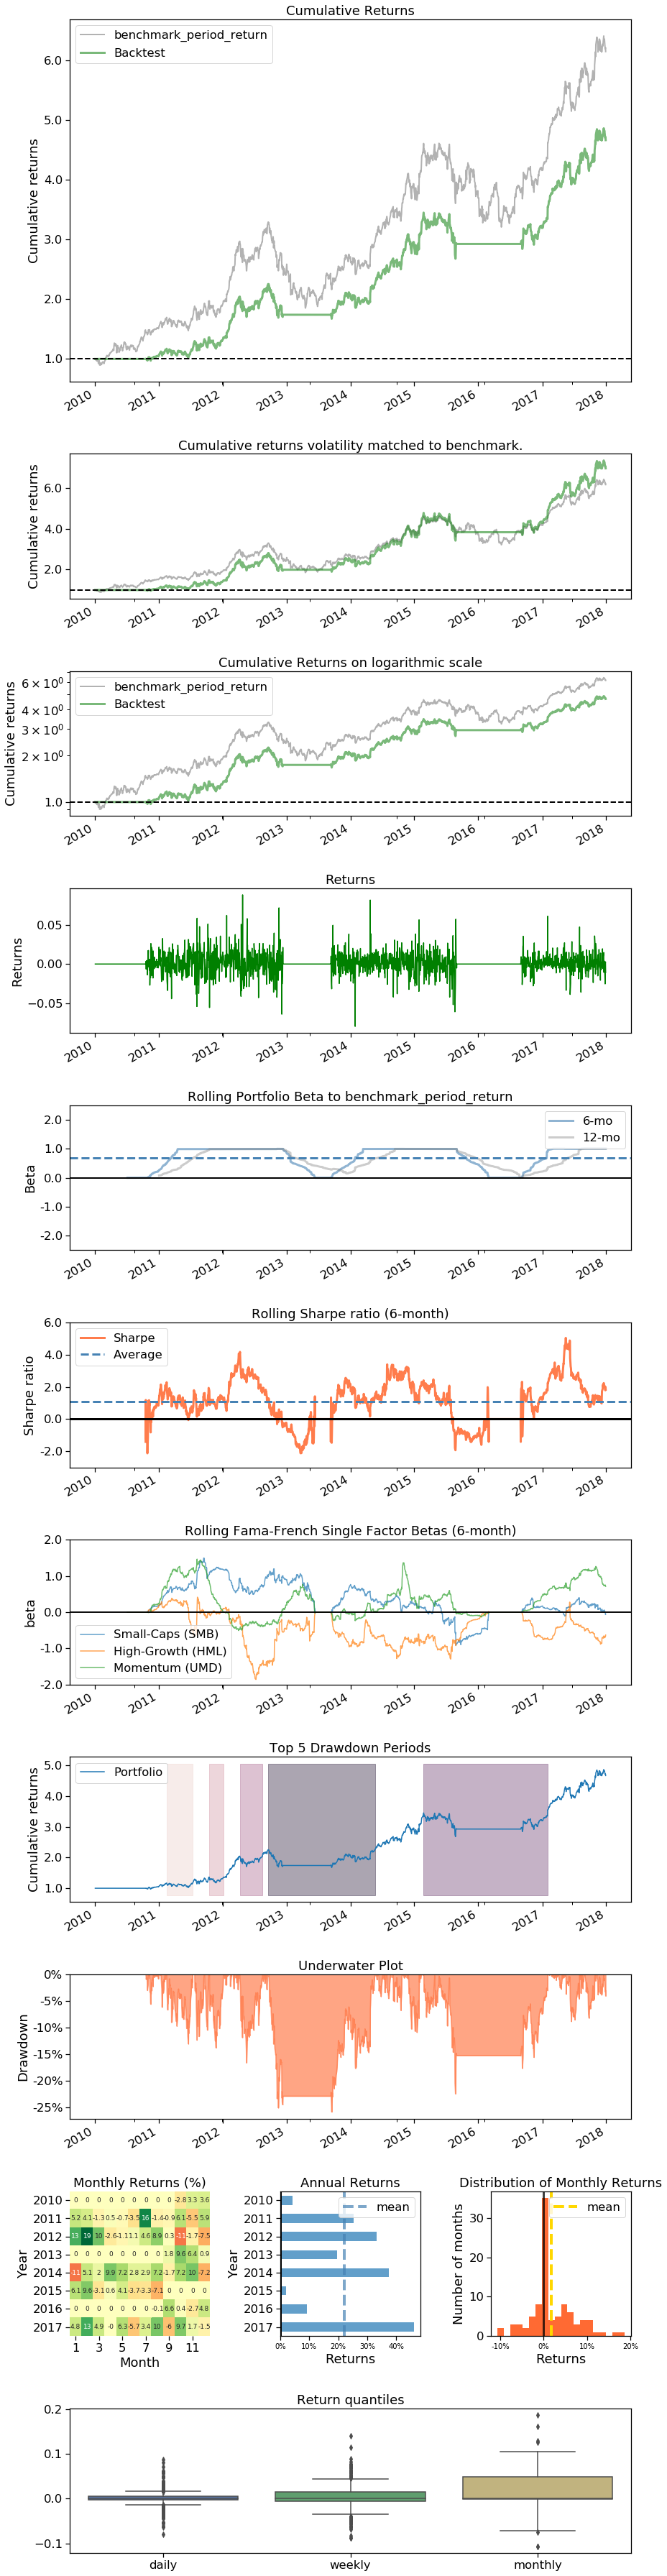

Stress Events,mean,min,max
US downgrade/European Debt Crisis,-0.01%,-5.42%,5.84%
Fukushima,-0.22%,-4.43%,2.59%
EZB IR Event,-0.25%,-2.59%,2.42%
Flash Crash,0.00%,0.00%,0.00%
Apr14,0.46%,-1.56%,8.16%
Oct14,0.31%,-1.55%,2.71%
Fall2015,-0.07%,-6.10%,5.72%
Recovery,0.08%,-6.40%,8.83%
New Normal,0.08%,-7.96%,8.16%


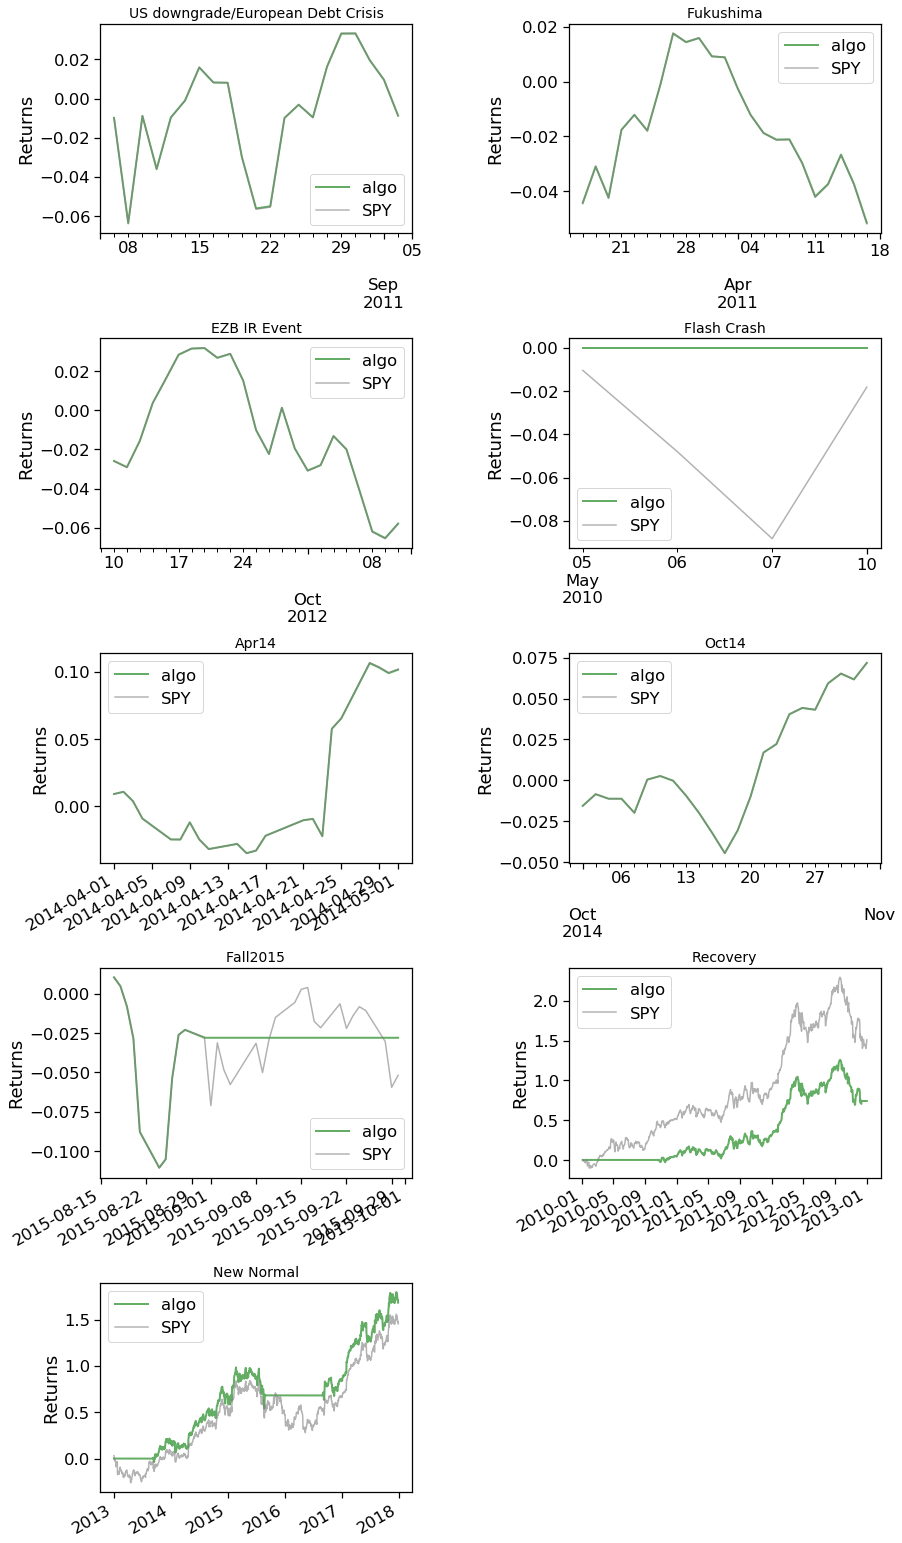

Top 10 long positions of all time,max
Equity(8 [AAPL]),100.09%


Top 10 short positions of all time,max


Top 10 positions of all time,max
Equity(8 [AAPL]),100.09%


All positions ever held,max
Equity(8 [AAPL]),100.09%


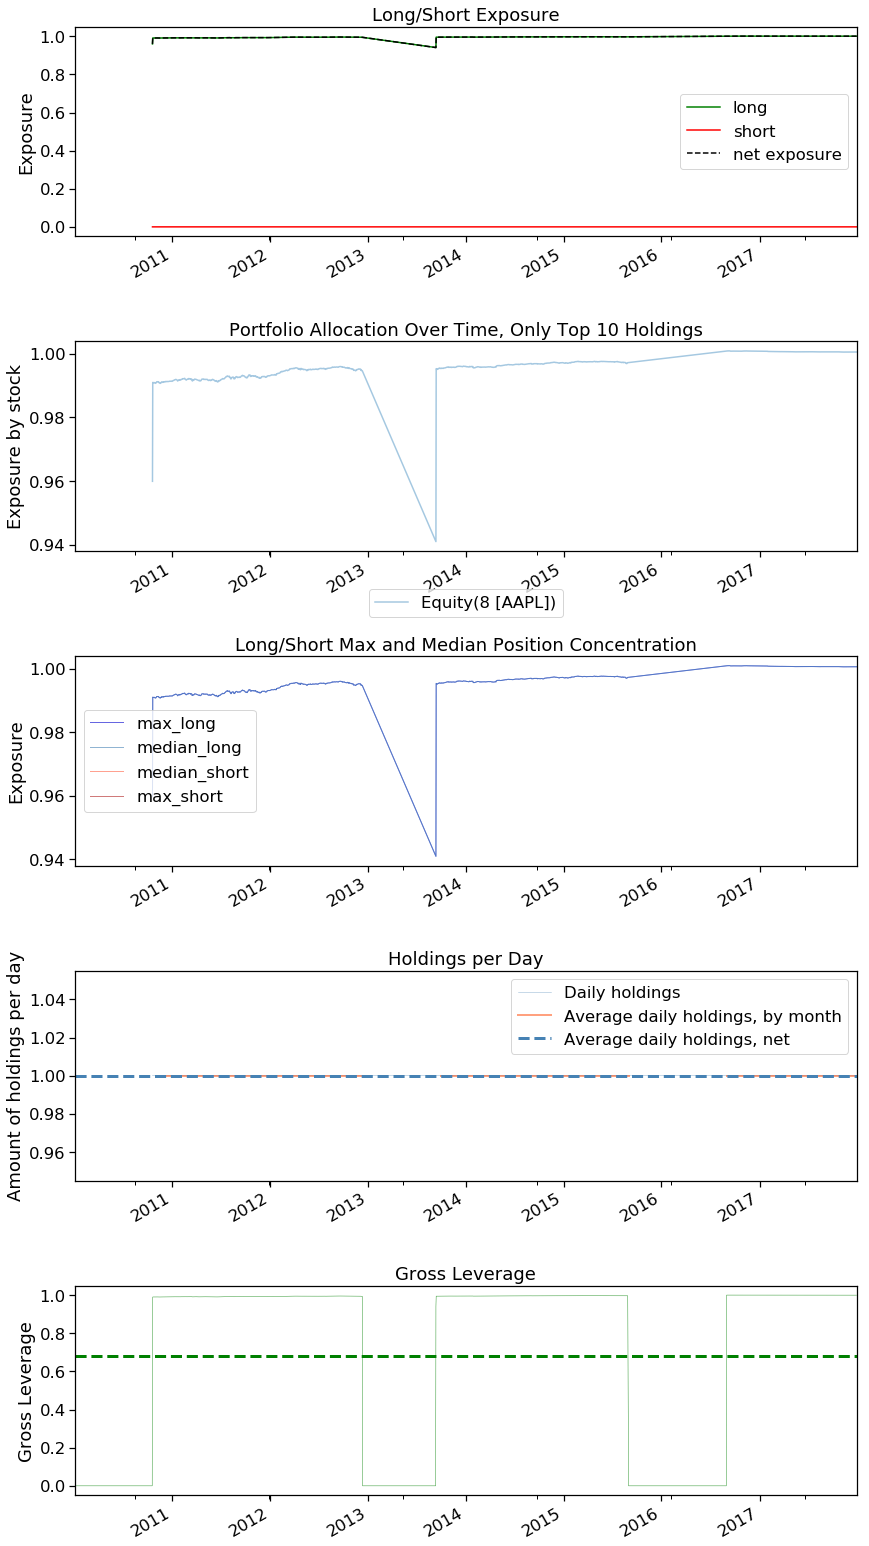

C:\anaconda\envs\quantum\lib\site-packages\pyfolio\plotting.py:1210: FutureWarning: 
.resample() is now a deferred operation
You called plot(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  **kwargs)


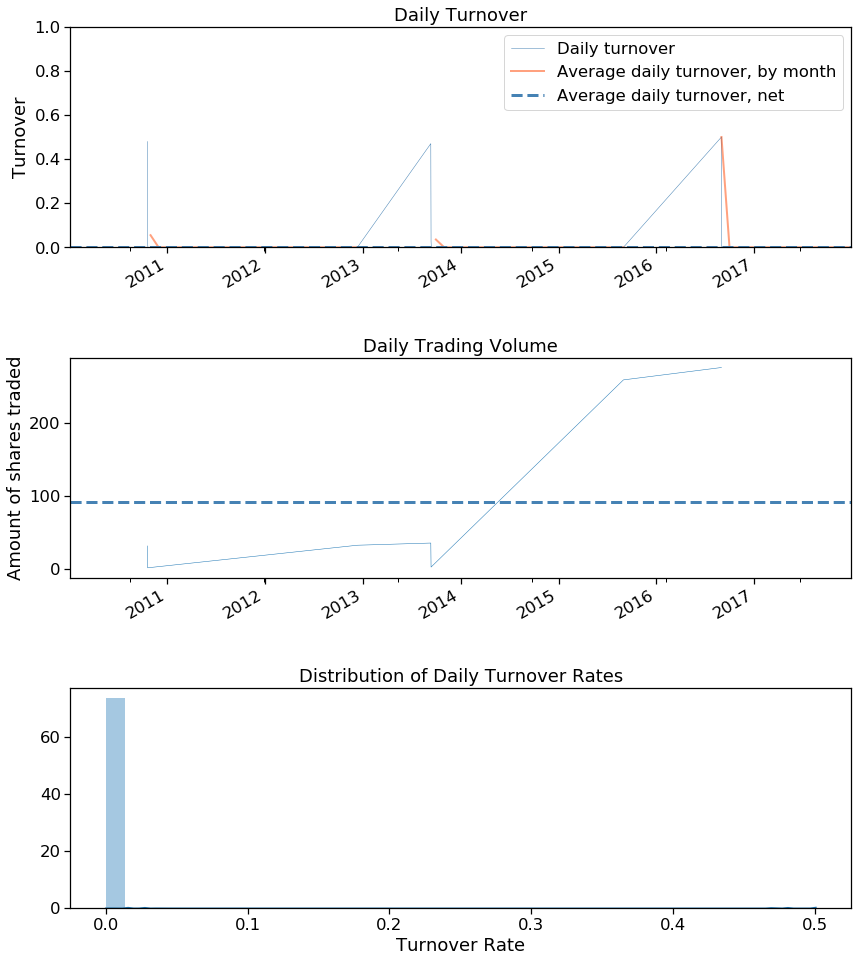

In [17]:
import pyfolio as pf
import numpy as np

# Extract algo returns and benchmark returns
returns, positions, transactions, gross_lev = pf.utils.extract_rets_pos_txn_from_zipline(perf)
benchmark_period_return = perf['benchmark_period_return']

# Convert benchmark returns to daily returns
#daily_returns = (1 + benchmark_period_return) / (1 + benchmark_period_return.shift()) - 1
daily_benchmark_returns = np.exp(np.log(benchmark_period_return + 1.0).diff()) - 1

# Create tear sheet
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, benchmark_rets=daily_benchmark_returns,
                         gross_lev=gross_lev)
